<a href="https://colab.research.google.com/github/Llanos99/G2-Algorithms/blob/main/AlgoritmosGeneticos/lab_grupo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Algoritmos Genéticos***

***Integrantes:***

1. Camilo Andres Cardenas Vargas
2. Anderson Andres Llanos Quintero
3. Santiago Tovar Mosquera
4. Brayan Daniel Romero Ardila
5. Daniel Felipe Quiroga Parra


In [5]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

# Consideremos las siguientes notaciones:
# T -> Tamaño del Genoma.
# P -> Tamaño de la poblacion.
# G -> Número de generaciones.
# R -> Rango de búsqueda.

# Funcion para mutar un individuo -> O(R)

def mutar(individual, gen_size, a, b):
  new_individual = 0
  non_valid_individual = True
  gen_to_mutate = random.randint(0, gen_size - 1)
  while non_valid_individual: #O(R)
    mutation = random.randint(0, 9)
    new_individual = (individual//10**(gen_size-gen_to_mutate))*10**(gen_size-gen_to_mutate)
    new_individual += mutation*(10**(gen_size-gen_to_mutate-1))
    new_individual += individual%(10**(gen_size-gen_to_mutate-1))
    if (a*(10**(gen_size-1)) <= new_individual) and (b*(10**(gen_size-1)) >= new_individual):
      non_valid_individual = False
  return new_individual

# Algoritmo genetico en accion -> O(G*R*P*P) = O(n^4), 3 for iterados.
# Ingresamos todos los parametros de una vez. f es la funcion a optimizar y a,b los limites del intervalo donde buscamos optimizar.

def genetical_algorithm(gen_size, tamano_poblacion_inicial, mutacion_prob, tamano_generaciones_simular, f, a, b):

  # Calculamos el numero de cifras enteras.
  n_cifras_enteras = max([len(list(str(abs(math.floor(a))))), len(list(str(abs(math.floor(b-0.00000001)))))])

  # El genoma sera entonces un numero con 10^(gen_size) cifras, por facilidad de calculo.
  poblacion = [random.randrange(a*(10**(gen_size-1)), b*(10**(gen_size-1))) for i in range(tamano_poblacion_inicial)] #O(P)

  # Para calculos numericos, hacemos uso de la libreria Numpy.
  poblacion = np.array(poblacion)

  # Un array con el que almacenamos el error promedio de la poblacion en funcion de su generacion.
  error_promedio = []

  # Un array vacia para almacenar el mejor individuo por generacion.
  mejor_individuo = []

  # Vectorizamos la funcion.
  vf = np.vectorize(f)

  for g in range(tamano_generaciones_simular):  # -> O(G)
    tamano_poblacion = np.shape(poblacion)[0]
    # Evaluamos f en cada individuo
    valores_poblacion = vf(poblacion/(10**(gen_size-n_cifras_enteras)))
    # Escogemos el individuo con el mejor desempeño -> Valor maximo.
    max_generacion = max(poblacion/(10**(gen_size-n_cifras_enteras)), key=f)
    # Guardamos nuestro individuo en la lista de los mejores.
    mejor_individuo.append(max_generacion)
    # Obtenemos el error promedio de la generacion.
    error_generacion = (1/tamano_poblacion)*sum(abs(f(max_generacion)-valores_poblacion))
    # Añadimos el error a la lista de errores.
    error_promedio.append(error_generacion)

    # Evaluamos los individuos -> Dividimos los valores de los individuos entre la suma de la poblacion y asi obtener una probabilidad.
    normalizado = valores_poblacion/sum(valores_poblacion)

    # Revisamos ahora los hijos de una nueva generacion.
    descendientes = []

    # Recreamos la etapa de entrecruzamiento.
    for k in range(tamano_poblacion//2):  # O(P)
      # Seleccionamos los individuos que se reproduzcan por un proceso aleatorio con una probabilidad dada por normalizado.
      ancestros = np.random.choice(tamano_poblacion, 2, p=normalizado)
      # Punto de cruce aleatorio.
      punto_cruce = random.randint(0, gen_size-1)
      # Suponga que cada padre tiene 2 hijos.
      descendiente_1 = str(poblacion[ancestros[0]]).zfill(gen_size)[:punto_cruce] + str(poblacion[ancestros[1]]).zfill(gen_size)[punto_cruce:]
      descendiente_2 = str(poblacion[ancestros[1]]).zfill(gen_size)[:punto_cruce] + str(poblacion[ancestros[0]]).zfill(gen_size)[punto_cruce:]
      descendientes.append(int(descendiente_1))
      descendientes.append(int(descendiente_2))

    # Actualizamos la poblacion a la nueva generacion de descendientes.
    poblacion = np.array(descendientes)

    # Mutacion.
    # Cada individuo puede mutar con una probabilidad uniforme en (0, 1)
    individuo_prob = np.random.random(size=tamano_poblacion)  #O(P)
    a_mutar = individuo_prob<mutacion_prob
    # a_mutar -> Actua como un filtro para saber a quienes vamos a mutar.
    individuos_a_mutar = np.arange(tamano_poblacion)[a_mutar] #O(P)

    # Mutamos los individuos seleccionados.
    for j in individuos_a_mutar:  # O(R)*O(P)
      # Mutamos
      poblacion[j] = mutar(poblacion[j], gen_size, a, b)

  #Retornamos una aproximación del máximo global O(1)
  print(f"El máximo local se tomma en aproximadamente x={mejor_individuo[-1]} y={f(mejor_individuo[-1])}")

  #Parámetros para mejorar la graficación
  plt.rcParams.update({'font.size': 12})
  plt.rcParams["figure.figsize"] = (10.5,6)

  #Graficamos el error promedio
  plt.title("Error promedio en función de la generación")
  plt.xlabel("Error promedio")
  plt.ylabel("Generación")
  plt.plot(range(1,tamano_generaciones_simular+1),error_promedio,color="red")
  plt.show()

  #Graficamos los mejores individuo
  plt.title("Valor del mejor individuo")
  plt.xlabel("x")
  plt.ylabel("f(x)")
  mejor_individuo = np.array(mejor_individuo)
  eje_x = np.arange(a,b,(b-a)/10**3)
  eje_y = vf(eje_x)
  plt.plot(eje_x,eje_y)
  individuos_x = mejor_individuo
  individuos_y = [f(x) for x in individuos_x]
  plt.scatter(individuos_x,individuos_y,color="red")
  plt.show()


El máximo local se tomma en aproximadamente x=0.95993886176451 y=1.971213030390502


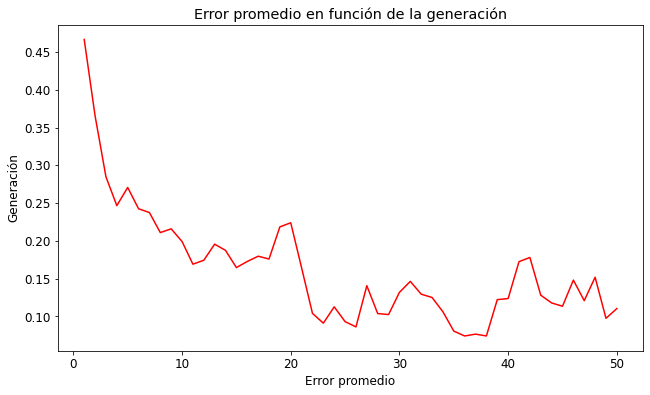

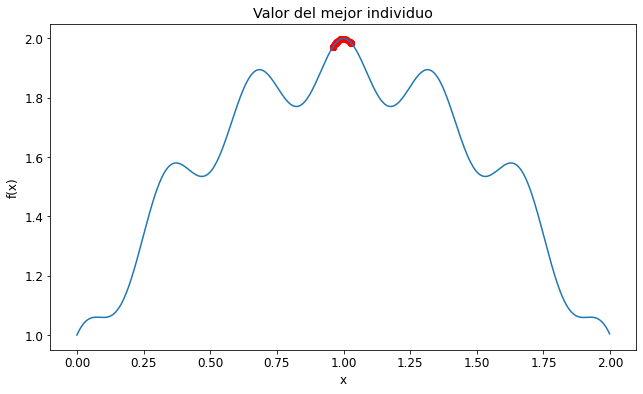

In [6]:
f = lambda x: -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2
genetical_algorithm(15,100,0.05,50,f,0,2)

# ***Analisis de complejidad***

La función principal, genetical_algorithm() está construida sobre bucles iterados. En base a los comentarios hechos a lo largo del código, podemos deducir que para este caso, la complejidad del algoritmo es del orden ***O(G x R x P x P)=O(n^4)***.

# ***¿Cómo se comporta el algoritmo con otro tipo de funciones?***

Consideremos las siguientes funciones

***Función 1 : sin(3x)+cos(5x)+4***

***Función 2 : sin(x^2)*cos(x)+2***

***Función 3 : 5x+1***

El máximo local se tomma en aproximadamente x=2.5327180468944537 y=5.962732126828262


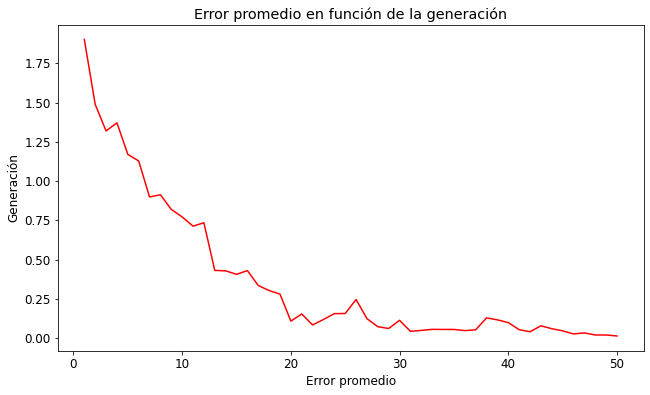

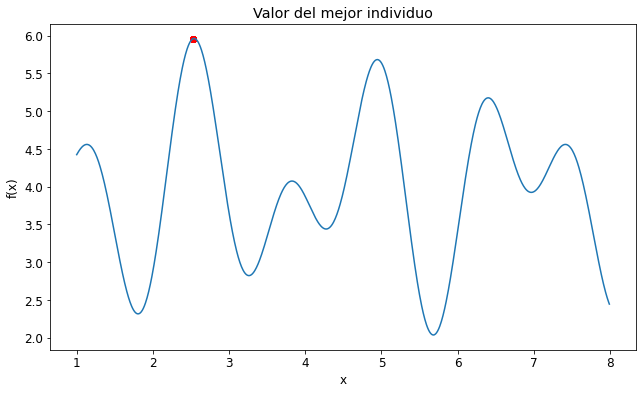

In [7]:
# Análisis para la función 1.
f1 = lambda x: math.sin(3*x)+math.cos(5*x)+4
genetical_algorithm(200, 50, 0.01, 50, f1, 1, 8)

El máximo local se tomma en aproximadamente x=3.26183224634369 y=2.930522523572901


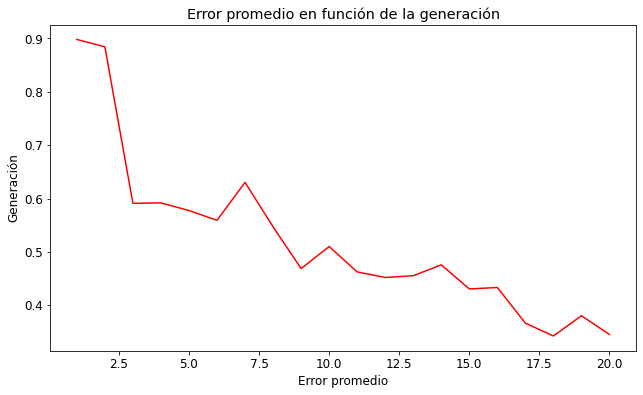

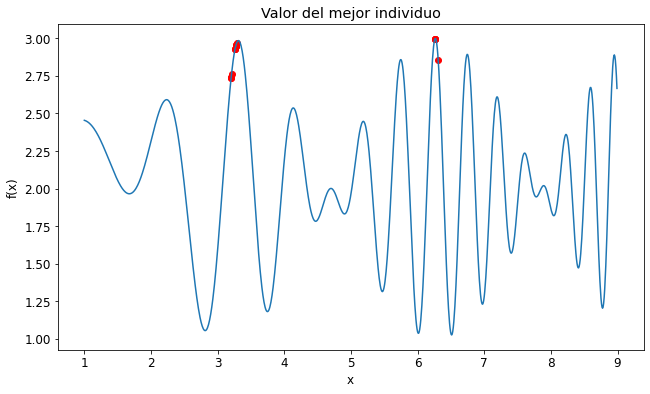

In [17]:
# Análisis para la función 2.
f2 = lambda x: math.sin(x**2)*math.cos(x)+2
genetical_algorithm(15, 60, 0.2, 20, f2, 1, 9)

El máximo local se tomma en aproximadamente x=8.99066655183586 y=45.9533327591793


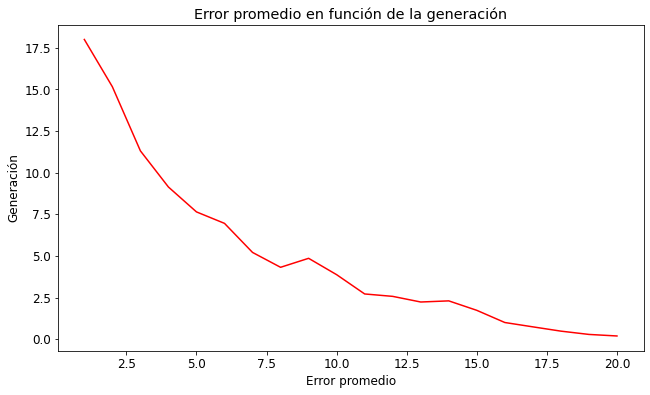

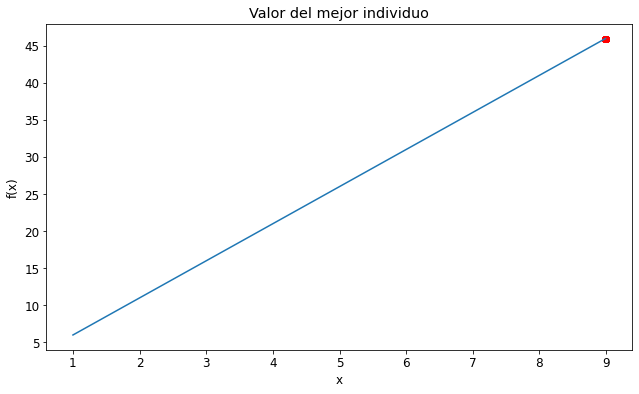

In [22]:
# Análisis para la función 3.
f3 = lambda x: 5*x+1
genetical_algorithm(50, 60, 0.1, 20, f3, 1, 9)

Con las tres funciones anteriores, vemos que para las funciones lineales, si importar cuales parámetros le demos a la función, esta va a encontrar el máximo global siempre (que es de esperar, pues este tipo de funciones solo tiene un máximo y un mínimo en algún intervalo determinado). Para las funciones oscilantes, los individuos se acercan al óptimo global en base a los parámetros dados. Para este tipo de funciones oscilantes se puede ver, fuertemente, que dependen mucho de los parámetros que le demos a la función, algunas mutaciones, en algunos casos, serán de ayuda para encontrar algunos valores óptimos y globales.





# ***¿Cómo están relacionados los parámetros de configuración del algoritmo con el costo tanto en tiempo como espacio?***

La cantidad de memoria requerida por el algoritmo, según la implementación, dependen de el tamaño del gen, el tamaño de la población inicial y el número de generaciones a simular. Siendo ahora algo más especificos, el ***tamaño de la población*** y el ***número de generaciones*** son los que determinan los intentos de mutación a lo largo del algoritmo, cuantos emparejamientos se realizan y que tantas veces toca repetir estos procesos a traves de las distintas generaciones, razones por las cuales, estos dos factores son los que más afectan el tiempo que tarda el algoritmo en completarse.

# ***¿Cuál sería el parámetro más relevante para acelerar la convergencia de la búsqueda?***

La ***probabilidad de mutación***. Si nos fijamos, si la probabilidad es muy alta puede que haya una divergencia. Y si por el contrario la probabilidad es baja, puede que nunca demos con el punto buscado. Por esta razón, la probabilidad de mutación altera el espacio de búsqueda y, por lo tanto, la tasa de convergencia.